In [1]:
from mvnx import MVNX
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import numpy as np

In [2]:
file = MVNX('../CHOLE_Robot_Joystick_M-001.mvnx')

In [13]:
joints_used = ['jL5S1','jL4L3','jL1T12','jT9T8','jT1C7','jC1Head','jRightT4Shoulder','jRightShoulder','jRightElbow','jRightWrist','jLeftT4Shoulder','jLeftShoulder','jLeftElbow','jLeftWrist']
joints_used

['jL5S1',
 'jL4L3',
 'jL1T12',
 'jT9T8',
 'jT1C7',
 'jC1Head',
 'jRightT4Shoulder',
 'jRightShoulder',
 'jRightElbow',
 'jRightWrist',
 'jLeftT4Shoulder',
 'jLeftShoulder',
 'jLeftElbow',
 'jLeftWrist']

In [9]:
file.joints.keys()

dict_keys(['jL5S1', 'jL4L3', 'jL1T12', 'jT9T8', 'jT1C7', 'jC1Head', 'jRightT4Shoulder', 'jRightShoulder', 'jRightElbow', 'jRightWrist', 'jLeftT4Shoulder', 'jLeftShoulder', 'jLeftElbow', 'jLeftWrist', 'jRightHip', 'jRightKnee', 'jRightAnkle', 'jRightBallFoot', 'jLeftHip', 'jLeftKnee', 'jLeftAnkle', 'jLeftBallFoot'])

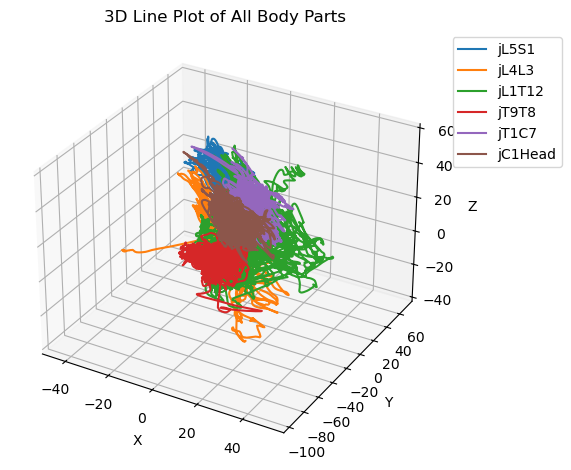

In [14]:
# Reduced data (e.g. one second of measurement)
file_com_red = file.centerOfMass[:, :]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each body part
for i, joint in enumerate(joints_used):
    start_col = i * 3
    if start_col + 2 >= file_com_red.shape[1]:
        break  # Stop if we run out of columns
    x = file_com_red[:, start_col]
    y = file_com_red[:, start_col + 1]
    z = file_com_red[:, start_col + 2]

    ax.plot(x, y, z, label=joint)  # You can also assign custom colors if desired


# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Line Plot of All Body Parts')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))  # Move legend outside

plt.tight_layout()
plt.show()

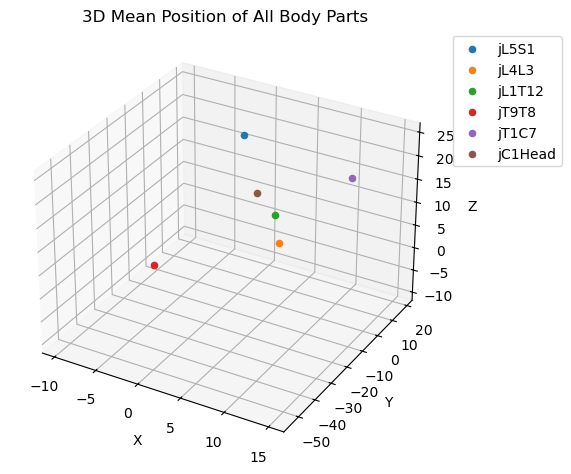

In [15]:
# Reduced data (e.g. one second of measurement)
file_com_red = file.centerOfMass[:, :]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot mean point for each joint
for i, joint in enumerate(joints_used):
    start_col = i * 3
    if start_col + 2 >= file_com_red.shape[1]:
        break  # Stop if we run out of columns
    
    # Compute mean coordinates
    x_mean = np.mean(file_com_red[:, start_col])
    y_mean = np.mean(file_com_red[:, start_col + 1])
    z_mean = np.mean(file_com_red[:, start_col + 2])

    # Plot mean as a dot
    ax.scatter(x_mean, y_mean, z_mean, label=joint)

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mean Position of All Body Parts')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))  # Move legend outside

plt.tight_layout()
plt.show()

In [16]:
# Prepare data for Plotly
x_means = []
y_means = []
z_means = []
labels = []

# Reduced data (e.g. one second of measurement)
file_com_red = file.centerOfMass[:, :]

for i, joint in enumerate(joints_used):
    start_col = i * 3
    if start_col + 2 >= file_com_red.shape[1]:
        break  # Stop if we run out of columns
    
    # Compute mean coordinates
    x_means.append(np.mean(file_com_red[:, start_col]))
    y_means.append(np.mean(file_com_red[:, start_col + 1]))
    z_means.append(np.mean(file_com_red[:, start_col + 2]))
    labels.append(joint)

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_means,
    y=y_means,
    z=z_means,
    mode='markers+text',
    marker=dict(size=5, color='blue'),
    text=labels,
    textposition='top center'
)])

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title='3D Mean Position of Body Joints',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()